# Libraries

In [1]:
%pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold


import optuna
import xgboost as xgb

import tensorflow as tf

C:\Users\firma\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Dataset

In [3]:
df_train = pd.read_csv('C:/Users/firma/Documents/Python/ML + BE/CLASSIFICATION/Kidney Stone Prediction/ML/Data/train.csv')
df_test = pd.read_csv('C:/Users/firma/Documents/Python/ML + BE/CLASSIFICATION/Kidney Stone Prediction/ML/Data/test.csv')
df_sample = pd.read_csv('C:/Users/firma/Documents/Python/ML + BE/CLASSIFICATION/Kidney Stone Prediction/ML/Data/sample_submission.csv')

# Data Information

## Train

In [4]:
df_train.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [6]:
obj = [col for col in df_train.columns if df_train[col].nunique() <= 10]
for col in obj:
   print(f"Column: {col}")
   print(f"Number of Unique Values (nunique): {df_train[col].nunique()}")
   print(f"Unique Values: {df_train[col].unique()}")
   print("Value Counts:")
   print(df_train[col].value_counts())
   print("-" * 50)

Column: target
Number of Unique Values (nunique): 2
Unique Values: [0 1]
Value Counts:
target
0    230
1    184
Name: count, dtype: int64
--------------------------------------------------


## Test

In [7]:
df_test.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


# Exploratory Data Analysis

## Numerical Plot

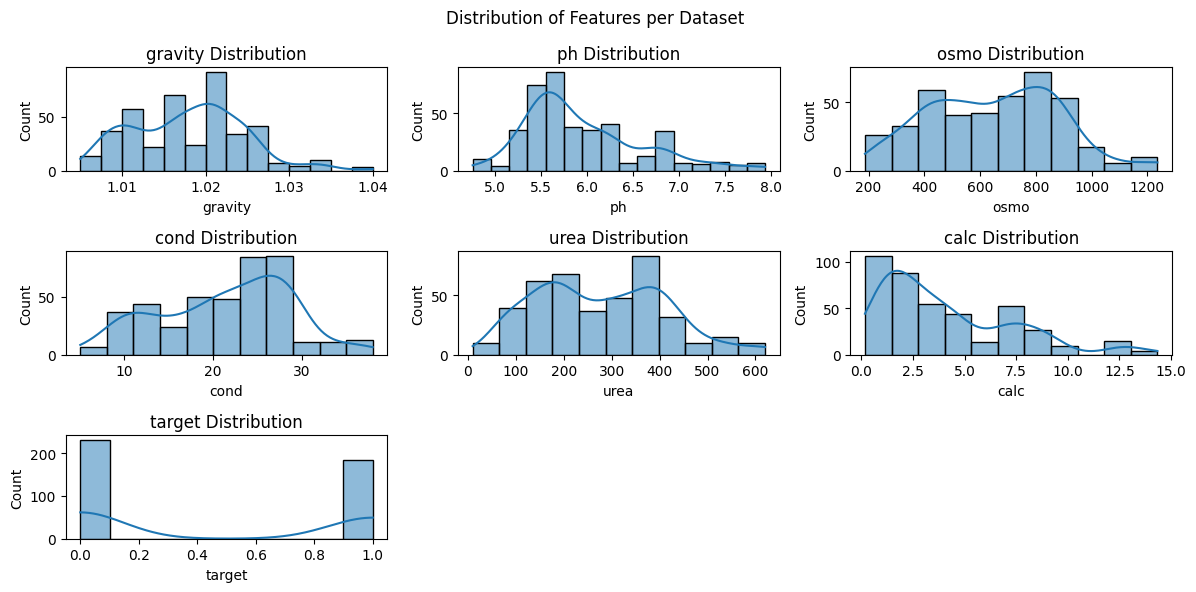

In [8]:
num_cols = [col for col in df_train.columns if df_train[col].dtype in ['float64', 'int64'] and col not in ['id']]
fig, axes = plt.subplots(3,3, figsize = (12,6))
axes = axes.flatten()

for i, col in enumerate(num_cols):
  ax = sns.histplot(data=df_train, x=col, ax=axes[i], kde=True)
  ax.set_title(f'{col} Distribution')
  ax.set_xlabel(f'{col}')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

fig.suptitle('Distribution of Features per Dataset')
plt.tight_layout()
plt.show()

## Categorical

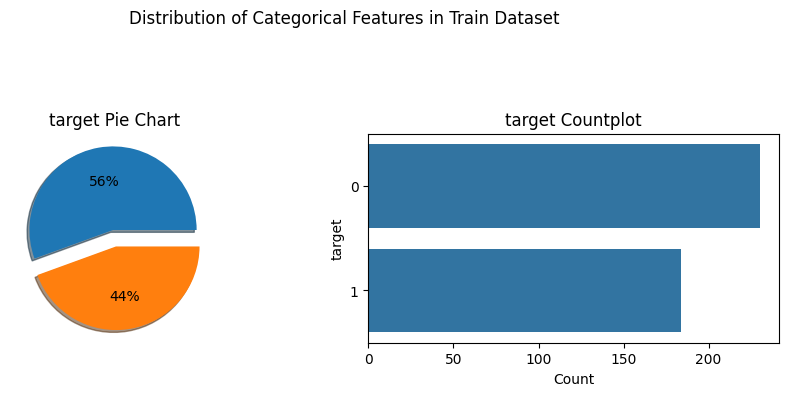

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

ax = axes[0]
ax.pie(
    df_train['target'].value_counts(),
    shadow=True,
    explode=[0.1 for _ in range(df_train['target'].nunique())],
    autopct='%1.f%%'
)
ax.set_aspect('equal')
ax.set_title('target Pie Chart')

ax1 = axes[1]
sns.countplot(
    y='target',
    ax=ax1,
    order=df_train['target'].value_counts().index,
    data=df_train
)
ax1.set_xlabel('Count')
ax1.set_ylabel('target')
ax1.set_title('target Countplot')

fig.suptitle('Distribution of Categorical Features in Train Dataset\n\n\n')

plt.tight_layout()
plt.show()

## Heatmap

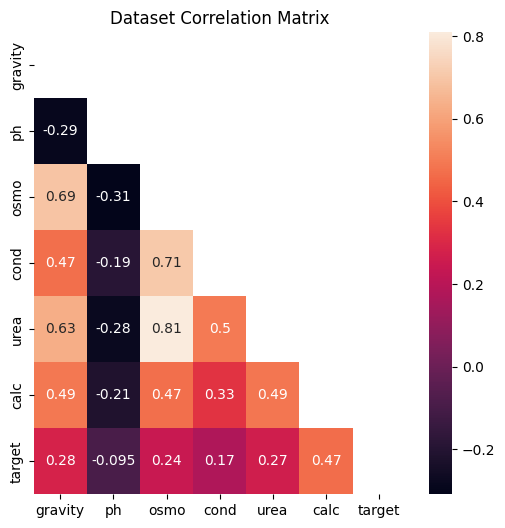

In [10]:
columns = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64'] and col not in ['id']]

corr = df_train[columns].corr()
plt.figure(figsize=(6, 6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Dataset Correlation Matrix')
plt.show()